In [64]:
%matplotlib nbagg
# import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# from scipy.optimize import curve_fit

inputFilePath = 'X:\\RIXS\\Ruiz_e18603\\RIXS\\'
outputFilePath = 'C:\\Users\\gac-x03ma\\Desktop\\ASC\\'

base = 'Cu'
energyTrans = 0.008128 #eV/subpixel


In [65]:
#os.chdir(outputFilePath)

def getdata(scannumber):
    global inputFilePath
    global outputFilePath
    global base
    
    if scannumber < 10:
        filename = base+"_"+"000"+str(scannumber)
    elif scannumber < 100:
        filename = base+"_"+"00"+str(scannumber)
    elif scannumber < 1000:    
        filename = base+"_"+"0"+str(scannumber)
    else:    
        filename = mypath+base+"_"+str(scannumber)

    f1 = h5py.File(inputFilePath+filename+"_d1.h5", 'r')
    f2 = h5py.File(inputFilePath+filename+"_d2.h5", 'r')
    f3 = h5py.File(inputFilePath+filename+"_d3.h5", 'r')

    ccd1 = f1['entry']['analysis']['spectrum'][()]
    ccd2 = f2['entry']['analysis']['spectrum'][()]
    ccd3 = f3['entry']['analysis']['spectrum'][()]
    
    [xdata,data1] = elasticShift(ccd1)
    [_,data2] = elasticShift(ccd2)
    [_,data3] = elasticShift(ccd3)

    tempData = (data1+data2+data3)/3
    data = [xdata,tempData]
    
#    np.savetxt(outputFilePath+filename+'.dat' , np.transpose(data) , #delimiter=", ",
#             newline="\n" , comments="# " , header="energyloss, counts"
#              )
    
    return data

def elasticShift(pixelData):

    global energyTrans

    peaks, _ = find_peaks(pixelData,height=100,width=5)
    xdataPixel = np.arange(len(pixelData))
    
    xdataPixel = xdataPixel[(peaks[-1]-2000):(peaks[-1]+200)]
    energyData = pixelData[(peaks[-1]-2000):(peaks[-1]+200)]
    
    xDataEnergy = (xdataPixel - peaks[-1]) * energyTrans * -1

    return [xDataEnergy,energyData]


<IPython.core.display.Javascript object>


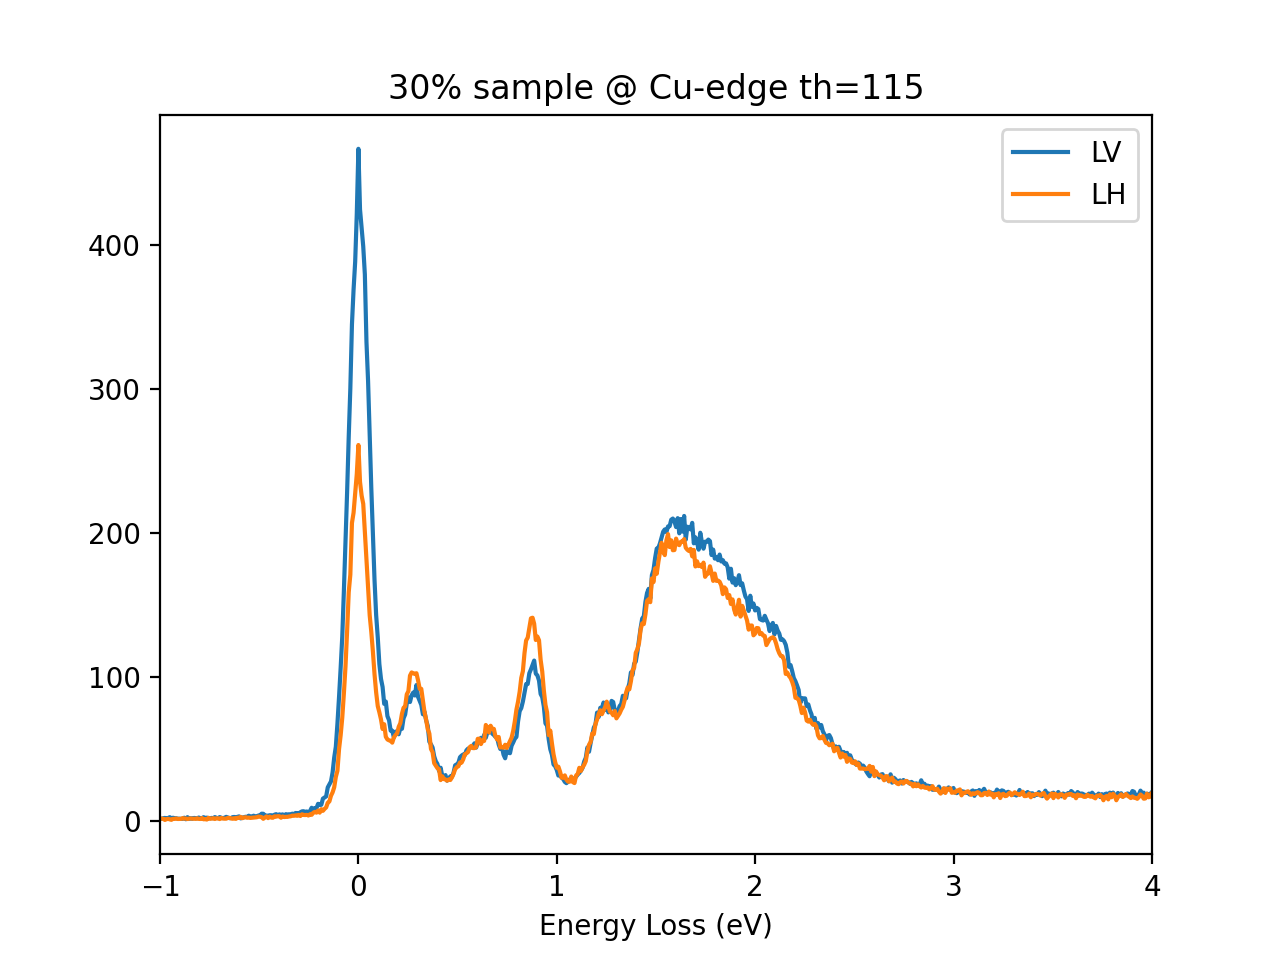

In [84]:
fig = plt.figure() 


scans = np.arange(289,293+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)

plt.plot(xData,aveData,  label='LV')


scans = np.arange(442,446+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)

plt.plot(xData,aveData, label='LH')

plt.xlabel('Energy Loss (eV)')
plt.xlim([-1,4])
plt.title('30% sample @ Cu-edge th=115')
plt.legend()

<IPython.core.display.Javascript object>


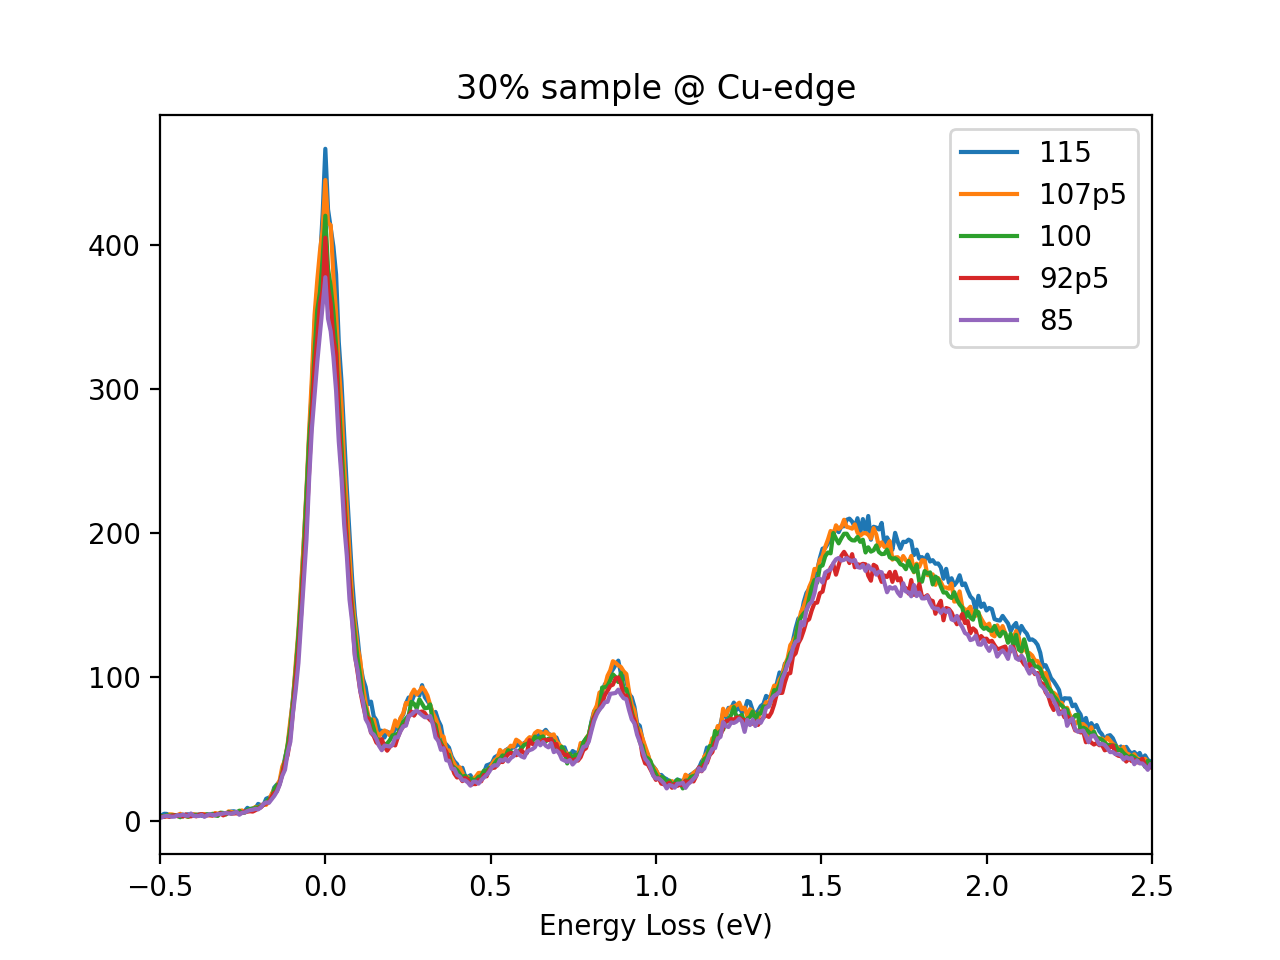

In [83]:
fig = plt.figure()

scans = np.arange(289,293+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)
plt.plot(xData,aveData,  label='115')


scans = np.arange(322,326+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)
plt.plot(xData,aveData, label='107p5')


scans = np.arange(299,303+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)
plt.plot(xData,aveData,  label='100')



scans = np.arange(332,336+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)
plt.plot(xData,aveData, label='92p5')

scans = np.arange(309,313+1)
sumData = np.zeros(2200)

for i,s in enumerate(scans):
    [xData,oneData] = getdata(s)
    # plt.plot(xData,oneData)

    sumData = sumData+oneData

aveData = sumData/len(scans)
plt.plot(xData,aveData, label='85')


plt.xlabel('Energy Loss (eV)')
plt.xlim([-.5,2.5])
plt.title('30% sample @ Cu-edge')
plt.legend()